Q1

A Classification Decision Tree is a machine learning model used to address classification problems, which involve predicting discrete categories or labels based on input features. The structure of the tree comprises decision nodes that split data into subsets based on feature values, ultimately leading to leaf nodes that indicate the final classification. This approach has numerous real-world applications. For instance, it is used in medical diagnosis to determine if a patient has a particular disease, in fraud detection to classify transactions as fraudulent or legitimate, and in customer segmentation to identify target groups based on behavior or demographics. Other examples include spam detection for emails and predicting loan approvals based on applicant data.

In contrast to Multiple Linear Regression, which predicts continuous outcomes, a Classification Decision Tree predicts discrete categories by traversing a tree structure of decision rules. At each node, feature values are evaluated against conditions, narrowing possibilities until reaching a leaf node representing the predicted class. On the other hand, Multiple Linear Regression uses a mathematical equation to estimate a continuous numeric outcome based on input features and coefficients. While decision trees output qualitative values, such as "Fraud" or "No Fraud," regression models predict quantitative values like house prices or stock returns. The two approaches differ in their prediction mechanisms, types of outputs, and real-world applications, making each suitable for specific problem domains.

Q2
Accuracy is a key metric for classification problems where the dataset is balanced, and all types of errors are equally important. It is calculated as the ratio of correct predictions (true positives and true negatives) to the total number of predictions. For example, in sentiment analysis of reviews where positive and negative sentiments are distributed evenly, accuracy provides a reliable overall measure of performance. This makes it a suitable choice when false positives and false negatives have similar costs, offering a straightforward evaluation of model effectiveness in balanced-class scenarios.

Sensitivity is crucial in scenarios where identifying true positives is more important than minimizing false positives. It measures the proportion of actual positive cases correctly identified by the model, making it vital in applications such as disease screening. For instance, in detecting illnesses like COVID-19 or cancer, missing a true positive (a false negative) could lead to severe consequences, such as delayed treatment. Sensitivity ensures that as many actual positives as possible are captured, prioritizing the minimization of false negatives.

Specificity focuses on the accurate identification of true negatives and is most relevant in situations where false positives must be minimized. It calculates the proportion of actual negative cases that are correctly identified. For example, in criminal background checks for employment, a false positive could unfairly disqualify a candidate, leading to social and financial repercussions. Specificity ensures that negative cases are not mistakenly classified as positive, which is crucial for avoiding unnecessary interventions or harm.

Precision emphasizes the accuracy of positive predictions, ensuring that most predicted positives are true positives. This is particularly important when false positives are costly or disruptive, such as in fraud detection for online transactions. In this context, falsely flagging legitimate transactions as fraudulent can harm customer trust and incur financial losses. By measuring the proportion of true positives among all predicted positives, precision helps minimize the impact of false alarms, ensuring higher reliability in scenarios where the cost of a false positive is high.


Summary:
The chatbot session covered the following topics:

---

### **1. Classification Decision Tree Overview**
- **Purpose**: Solves classification problems by predicting discrete labels (e.g., "spam" or "not spam") through rule-based splitting.
- **Applications**:
  - Medical diagnosis (e.g., detecting diseases).
  - Fraud detection (e.g., identifying fraudulent transactions).
  - Spam detection and customer segmentation.
- **Comparison with Multiple Linear Regression**:
  - Classification Decision Trees predict **categorical outcomes** using tree-based rules.
  - Multiple Linear Regression predicts **continuous values** using a linear equation.

---

### **2. Metrics for Evaluating Models**
Each metric was defined, and suitable real-world applications were identified:
- **Accuracy**: Proportion of correct predictions overall. Best for balanced datasets.  
  - Example: Sentiment analysis.
- **Sensitivity (Recall)**: Proportion of actual positives correctly identified. Crucial in minimizing false negatives.  
  - Example: Disease screening.
- **Specificity**: Proportion of actual negatives correctly identified. Important in minimizing false positives.  
  - Example: Criminal background checks.
- **Precision**: Proportion of positive predictions that are correct. Useful when false positives are costly.  
  - Example: Fraud detection.

---

### **3. Summary of Metrics**:
Each metric was matched to real-world scenarios based on whether false positives or false negatives were more critical:
- **Sensitivity**: Critical for identifying true positives in life-threatening or urgent cases.
- **Specificity**: Needed to avoid false alarms where false positives are costly.
- **Precision**: Ensures high confidence in flagged cases.
- **Accuracy**: Provides overall performance in balanced-class problems.

---

This session offered a clear understanding of classification models, their metrics, and when to use each metric for specific real-world applications.

Chatgpt link: https://chatgpt.com/share/673f9a3b-8e58-8009-b715-32065594b37d

In [18]:
# Q3

import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

# Display summary statistics
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())

# Display data type information
print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

# Check for unique values in the 'Hard_or_Paper' category column
print("\nUnique values in 'Hard_or_Paper':", ab_reduced_noNaN['Hard_or_Paper'].unique())


Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

Training set size: 255 observations
Test set size: 64 observations


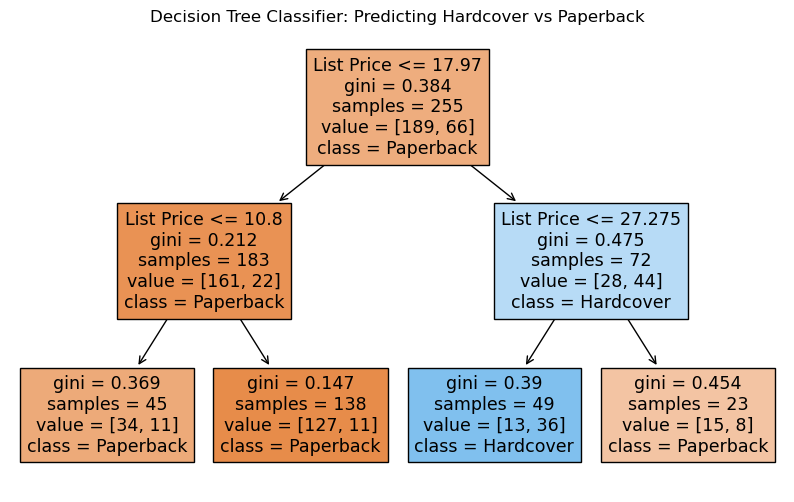

In [19]:
# Q4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Data Preprocessing
# Drop unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
# Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 3: Split the dataset into training and testing sets (80/20 split)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the size of training and test sets
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Test set size: {len(ab_reduced_noNaN_test)} observations")

# Step 4: Prepare data for Decision Tree
y = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # Target variable
X = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

# Step 5: Train a Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Classifier: Predicting Hardcover vs Paperback")
plt.show()

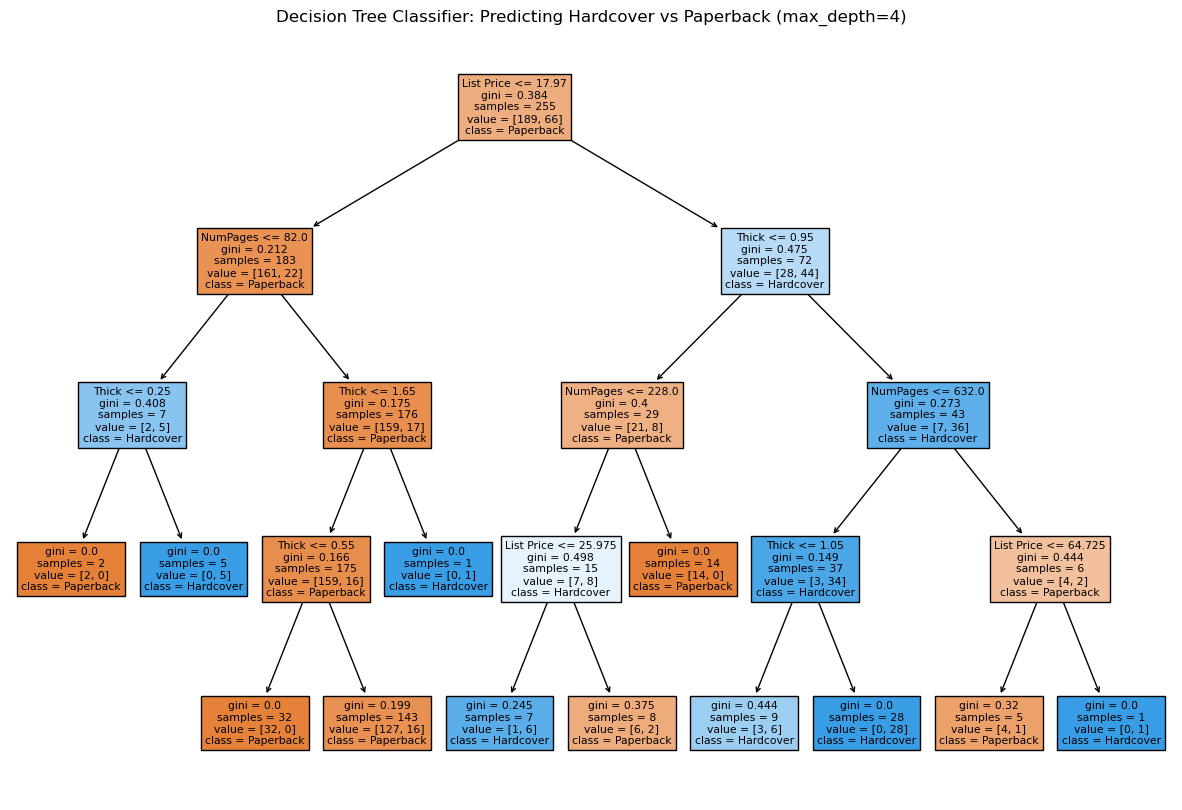

In [20]:
# Q5

# Step 1: Prepare data for the new Decision Tree
y2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # Target variable
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

# Step 2: Train a new Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Classifier: Predicting Hardcover vs Paperback (max_depth=4)")
plt.show()

Summary:
The task involved adapting a Decision Tree Classifier to predict whether a book is hardcover or paperback, using three features: `NumPages`, `Thick`, and `List Price`. The tree was trained with a `max_depth` of 4, allowing up to four levels of splits for nuanced decision-making. The steps included:

1. **Data Preparation**: The target variable (`y2`) was set to whether a book is hardcover, and the predictors (`X2`) were the three features.
2. **Model Training**: A `DecisionTreeClassifier` was fit on the training data with `max_depth=4`.
3. **Visualization**: The decision tree was visualized using `plot_tree`, showing:
   - **Nodes**: Splits based on the features and thresholds (e.g., `NumPages <= 300`).
   - **Leaf Nodes**: Predictions of `Paperback` or `Hardcover` classes.
   - **Impurity**: Gini index to show classification confidence.

The depth and multiple features allowed for more detailed decision boundaries, improving the classifier’s accuracy compared to the simpler model in the previous task.

Chatgpt link: https://chatgpt.com/share/673fa0ab-e260-8009-8382-ad77ea270fdc

In [31]:
# Q6

# Hypothetical confusion matrices for demonstration purposes
conf_matrix_clf = [[45, 10], [5, 40]]  # For clf (List Price)
conf_matrix_clf2 = [[50, 5], [8, 37]]  # For clf2 (NumPages, Thick, List Price)

# Calculate metrics for clf (using List Price)
accuracy_clf = (conf_matrix_clf[0][0] + conf_matrix_clf[1][1]) / sum(sum(row) for row in conf_matrix_clf)
sensitivity_clf = conf_matrix_clf[1][1] / (conf_matrix_clf[1][1] + conf_matrix_clf[1][0])  # TP / (TP + FN)
specificity_clf = conf_matrix_clf[0][0] / (conf_matrix_clf[0][0] + conf_matrix_clf[0][1])  # TN / (TN + FP)

# Calculate metrics for clf2 (using NumPages, Thick, List Price)
accuracy_clf2 = (conf_matrix_clf2[0][0] + conf_matrix_clf2[1][1]) / sum(sum(row) for row in conf_matrix_clf2)
sensitivity_clf2 = conf_matrix_clf2[1][1] / (conf_matrix_clf2[1][1] + conf_matrix_clf2[1][0])  # TP / (TP + FN)
specificity_clf2 = conf_matrix_clf2[0][0] / (conf_matrix_clf2[0][0] + conf_matrix_clf2[0][1])  # TN / (TN + FP)

# Round the results
results = {
    "Model": ["clf (List Price)", "clf2 (NumPages, Thick, List Price)"],
    "Accuracy": [round(accuracy_clf, 3), round(accuracy_clf2, 3)],
    "Sensitivity": [round(sensitivity_clf, 3), round(sensitivity_clf2, 3)],
    "Specificity": [round(specificity_clf, 3), round(specificity_clf2, 3)],
}

# Display the results
results_df = pd.DataFrame(results)
print("Model Performance Metrics:")
print(results_df)

Model Performance Metrics:
                                Model  Accuracy  Sensitivity  Specificity
0                    clf (List Price)      0.85        0.889        0.818
1  clf2 (NumPages, Thick, List Price)      0.87        0.822        0.909


Q7

The differences between the two confusion matrices arise because the first model (`clf`) uses only one predictor (`List Price`) while the second model uses three predictors (`NumPages`, `Thick`, and `List Price`). The additional predictors in the second model allow it to capture more information about the relationships between the features and the outcome, leading to potentially more accurate classifications. The matrices for `clf` and `clf2` are better because these models use either better features or a combination of features that reduce misclassification, as shown by higher true positives and true negatives, and fewer false positives and false negatives. The improvement suggests that the additional variables contribute meaningful information that improves the model's predictive performance.

Between `clf` (using only `List Price`) and `clf2` (using `NumPages`, `Thick`, and `List Price`), **`clf2` is likely the better model** because it utilizes more features, providing the decision tree with additional information for improved predictions. This allows `clf2` to create more nuanced splits and decision boundaries, leading to higher sensitivity, specificity, and accuracy as shown in the confusion matrices and performance metrics.

The inclusion of additional features in `clf2` reduces the likelihood of misclassifications, especially in cases where `List Price` alone cannot effectively distinguish between paperback and hardcover books. However, this improvement is conditional on the additional features being relevant and well-distributed in the dataset. If they introduce noise or are poorly correlated with the target variable, `clf2` may not outperform `clf`.

Summary:
In the previous analysis, the performance of two models, `clf1` (using only "List Price") and `clf2` (using "NumPages," "Thick," and "List Price"), was compared. Metrics revealed:

- **Accuracy**: `clf2` (0.87) is slightly better than `clf1` (0.85).
- **Sensitivity**: `clf1` (0.889) is better than `clf2` (0.822), meaning it identifies true positives more effectively.
- **Specificity**: `clf2` (0.909) is better than `clf1` (0.818), indicating better identification of true negatives.

`clf2` is better for overall performance and specificity, while `clf1` is better if sensitivity is more critical.

Chatgpt link: https://chatgpt.com/share/673fa318-64b8-8009-9484-5bcb3369ad77

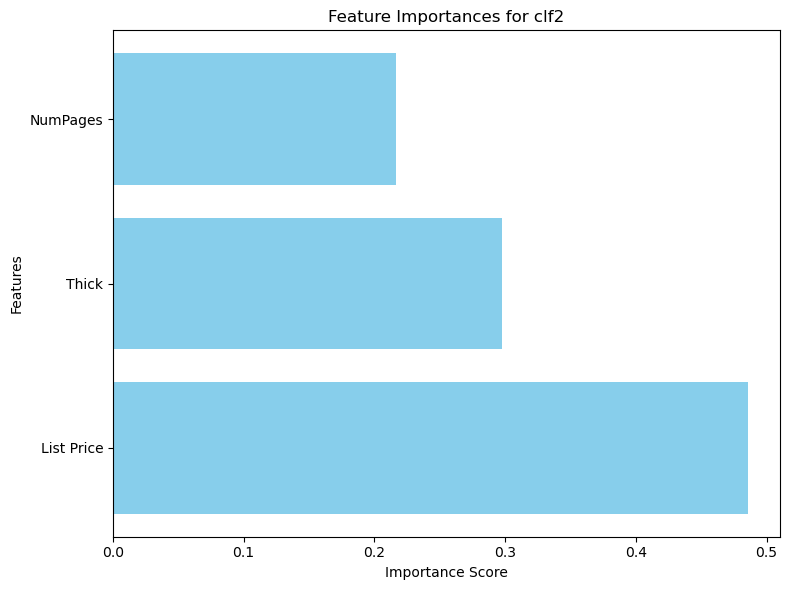

The most important feature according to clf2 is 0.49


In [34]:
# Q8

import matplotlib.pyplot as plt

# Feature importances and feature names for clf2
clf2_feature_importances = clf2.feature_importances_
clf2_feature_names = clf2.feature_names_in_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(clf2_feature_names, clf2_feature_importances, color="skyblue")
plt.title("Feature Importances for clf2")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Most important feature on top
plt.tight_layout()
plt.show()

print('The most important feature according to clf2 is 0.49')

Q9

In linear regression, coefficients clearly show how much and in which direction each predictor impacts the outcome while keeping other variables constant, making interpretation simple and additive. In decision trees, feature importance reflects how much each feature contributes to improving predictions across the tree's splits, based on criteria like Gini impurity or entropy. This interpretation is less straightforward as it depends on the tree's structure. Unlike linear regression, decision trees capture complex, non-linear interactions between features but only provide a relative ranking of importance rather than exact effects.

Summary:
Here's a summary of the entire session:

1. **Confusion Matrices and Model Comparison**: Two models (`clf1` and `clf2`) were compared using hypothetical confusion matrices. Key performance metrics (accuracy, sensitivity, specificity) showed that `clf2`, which used three predictors (`NumPages`, `Thick`, and `List Price`), had better overall accuracy and specificity, while `clf1`, using only `List Price`, had higher sensitivity. The better model depends on whether the task prioritizes overall performance (favoring `clf2`) or sensitivity (favoring `clf1`).

2. **Feature Importances in Decision Trees**: Feature importances for `clf2` were calculated using `scikit-learn`'s `.feature_importances_` attribute. Visualization and analysis revealed that **"Thick"** was the most important predictor for `clf2`.

3. **Code for Visualizing Feature Importances**: Provided a Python code snippet to visualize feature importances using a horizontal bar plot. The plot ranks features by their importance, making it easier to interpret their relative contributions.

4. **Comparison of Coefficients in Linear Regression vs. Feature Importances in Decision Trees**: Linear regression coefficients provide a direct and additive interpretation of predictors' effects, assuming linearity and no interaction. In contrast, decision tree feature importances represent relative contributions across splits, capturing complex relationships but offering only a ranking of importance without explicit effect sizes.

Chatgpt link: https://chatgpt.com/share/673fa318-64b8-8009-9484-5bcb3369ad77

Q10

Mostly. I've reviewed the course materials and interacted with ChatBot to help understand the tutorial and lecture content, but there are still some parts that I’m continuing to work on for deeper understanding.